# Predicting Female Labor Force Participation in Slovakia

## Project Motivation
Despite increased global awareness around gender equality, women’s participation in the labor market continues to vary significantly across regions. In Slovakia, understanding what factors impact women's workforce involvement can help shape better education, economic, and social policies.

## Goal
Use machine learning (linear regression) to predict **female labor force participation rate** using key socio-economic indicators from the World Bank.

## Business Questions
1. How has female labor force participation in Slovakia changed over time?
2. What is the relationship between education and female labor participation, and adolescent fertility and female labor participation?
3. Can we build a regression model to predict female labor force participation using features like GDP, poverty, adolescent fertility, and female school enrollment?

# Step 1: Data collection

Use the World Bank API (wbdata) to download dataset containing specific features required for this project. 

In [155]:
import pandas as pd

# Load CSV
df = pd.read_csv('data/b1cddaae-85a6-4917-87e9-75359b51d977_Data.csv')

# Inspect
df

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2007 [YR2007],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Slovak Republic,SVK,GDP per capita (Current US$),NY.GDP.PCAP.CD,5421.6448441887,5712.47802761654,6554.62808369461,8675.39633696465,10650.129010,11641.541032,...,16110.481727,16636.076913,17645.529872,19573.371703,19406.058968,19735.485828,22138.194983,21342.7666714692,24491.3771867262,..
1,Slovak Republic,SVK,"School enrollment, secondary, female (% gross)",SE.SEC.ENRR.FE,88.2810821533203,88.1246337890625,89.0171585083008,91.3358383178711,94.413651,95.744011,...,95.736008,92.074867,91.941071,92.461746,92.188499,91.691338,91.801987,92.8732299804688,..,..
2,Slovak Republic,SVK,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,23.832,21.385,20.996,20.791,20.773000,20.673000,...,20.774000,26.163000,27.017000,27.014000,26.699000,25.975000,25.872000,24.543,24.59,..
3,Slovak Republic,SVK,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,..,..,..,..,0.100000,0.200000,...,0.400000,1.400000,0.200000,0.200000,0.100000,0.200000,0.100000,..,..,..
4,Slovak Republic,SVK,Urban population (% of total population),SP.URB.TOTL.IN.ZS,56.233,56.163,56.013,55.863,55.713000,55.563000,...,55.261000,53.806000,53.751000,53.726000,53.729000,53.760000,53.820000,53.909,54.027,..
5,Slovak Republic,SVK,"Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,52.588,52.965,52.531,52.908,52.466000,51.177000,...,50.327000,52.511000,52.626000,52.241000,52.171000,51.795000,54.620000,55.692,55.721,55.427
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Data from database: Gender Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 2: Data cleaning

Reshape the df and impute missing values

In [156]:
# Drop last 5 rows
df = df.iloc[:-5]

# Drop first 2 columns - don't need them since all data is from SVK
df = df.drop(columns=['Country Name', 'Country Code', 'Series Code'])

# Inspect
df

,Series Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (Current US$),5421.6448441887,5712.47802761654,6554.62808369461,8675.39633696465,10650.129010,11641.541032,13167.895473,16110.481727,16636.076913,17645.529872,19573.371703,19406.058968,19735.485828,22138.194983,21342.7666714692,24491.3771867262,..
1,"School enrollment, secondary, female (% gross)",88.2810821533203,88.1246337890625,89.0171585083008,91.3358383178711,94.413651,95.744011,95.871223,95.736008,92.074867,91.941071,92.461746,92.188499,91.691338,91.801987,92.8732299804688,..,..
2,"Adolescent fertility rate (births per 1,000 wo...",23.832,21.385,20.996,20.791,20.773000,20.673000,20.489000,20.774000,26.163000,27.017000,27.014000,26.699000,25.975000,25.872000,24.543,24.59,..
3,Poverty headcount ratio at $2.15 a day (2017 P...,..,..,..,..,0.100000,0.200000,0.200000,0.400000,1.400000,0.200000,0.200000,0.100000,0.200000,0.100000,..,..,..
4,Urban population (% of total population),56.233,56.163,56.013,55.863,55.713000,55.563000,55.412000,55.261000,53.806000,53.751000,53.726000,53.729000,53.760000,53.820000,53.909,54.027,..
5,"Labor force participation rate, female (% of f...",52.588,52.965,52.531,52.908,52.466000,51.177000,50.548000,50.327000,52.511000,52.626000,52.241000,52.171000,51.795000,54.620000,55.692,55.721,55.427


In [157]:
# Melt the df to long format (years become rows)
df_long = df.melt(
    id_vars='Series Name',
    var_name='Year',                       
    value_name='Value'                 
)

# Extract only the year as integer from the year string
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# Coerce missing values into NaNs to ensure pivoting doesn't error out
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Pivot so that 'Year' is index, each series name is a column, and values fill the table
df_pivot = df_long.pivot_table(
    index='Year',         # years become rows (index)
    columns='Series Name', # series names become columns
    values='Value'        # data goes here
)

df_pivot

Series Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (Current US$),"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"School enrollment, secondary, female (% gross)",Urban population (% of total population)
Year,,,,,,
2000,23.832,5421.644844,52.588,NaN,88.281082,56.233
2001,21.385,5712.478028,52.965,NaN,88.124634,56.163
2002,20.996,6554.628084,52.531,NaN,89.017159,56.013
2003,20.791,8675.396337,52.908,NaN,91.335838,55.863
2004,20.773,10650.129010,52.466,0.1,94.413651,55.713
2005,20.673,11641.541032,51.177,0.2,95.744011,55.563
2006,20.489,13167.895473,50.548,0.2,95.871223,55.412
2007,20.774,16110.481727,50.327,0.4,95.736008,55.261
2016,26.163,16636.076913,52.511,1.4,92.074867,53.806


In [158]:
# Make sure 'Year' is set as index column and labeled properly as such
df = pd.DataFrame(df_pivot.to_dict())
df.index.name = 'year'

# Inspect
df

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",GDP per capita (Current US$),"Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population),"School enrollment, secondary, female (% gross)",Urban population (% of total population)
year,,,,,,
2000,23.832,5421.644844,52.588,NaN,88.281082,56.233
2001,21.385,5712.478028,52.965,NaN,88.124634,56.163
2002,20.996,6554.628084,52.531,NaN,89.017159,56.013
2003,20.791,8675.396337,52.908,NaN,91.335838,55.863
2004,20.773,10650.129010,52.466,0.1,94.413651,55.713
2005,20.673,11641.541032,51.177,0.2,95.744011,55.563
2006,20.489,13167.895473,50.548,0.2,95.871223,55.412
2007,20.774,16110.481727,50.327,0.4,95.736008,55.261
2016,26.163,16636.076913,52.511,1.4,92.074867,53.806


In [159]:
# Shorten column names
rename_map = {
    'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'adolescent_fertility_rate',
    'GDP per capita (Current US$)': 'gdp_per_capita',
    'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)': 'labor_force_participation_female',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)': 'poverty_headcount_ratio',
    'School enrollment, secondary, female (% gross)': 'school_enrollment_female',
    'Urban population (% of total population)': 'urban_population_pct'
}

df = df.rename(columns=rename_map)

# Inspect
df

,adolescent_fertility_rate,gdp_per_capita,labor_force_participation_female,poverty_headcount_ratio,school_enrollment_female,urban_population_pct
year,,,,,,
2000,23.832,5421.644844,52.588,NaN,88.281082,56.233
2001,21.385,5712.478028,52.965,NaN,88.124634,56.163
2002,20.996,6554.628084,52.531,NaN,89.017159,56.013
2003,20.791,8675.396337,52.908,NaN,91.335838,55.863
2004,20.773,10650.129010,52.466,0.1,94.413651,55.713
2005,20.673,11641.541032,51.177,0.2,95.744011,55.563
2006,20.489,13167.895473,50.548,0.2,95.871223,55.412
2007,20.774,16110.481727,50.327,0.4,95.736008,55.261
2016,26.163,16636.076913,52.511,1.4,92.074867,53.806


Now drop / impute missing values

In [160]:
# Most of the values in 2024 are NaNs so might as well drop the whole year
df = df.drop(index=2024, errors='ignore')

# Impute the rest of the values using forward-fill and backward-fill combination
# Given the values are a time series, this approach is a simple and effective way to maintain continuity without introducing bias
df = df.ffill().bfill()

# Inspect
df

,adolescent_fertility_rate,gdp_per_capita,labor_force_participation_female,poverty_headcount_ratio,school_enrollment_female,urban_population_pct
year,,,,,,
2000,23.832,5421.644844,52.588,0.1,88.281082,56.233
2001,21.385,5712.478028,52.965,0.1,88.124634,56.163
2002,20.996,6554.628084,52.531,0.1,89.017159,56.013
2003,20.791,8675.396337,52.908,0.1,91.335838,55.863
2004,20.773,10650.129010,52.466,0.1,94.413651,55.713
2005,20.673,11641.541032,51.177,0.2,95.744011,55.563
2006,20.489,13167.895473,50.548,0.2,95.871223,55.412
2007,20.774,16110.481727,50.327,0.4,95.736008,55.261
2016,26.163,16636.076913,52.511,1.4,92.074867,53.806


# Step 3: Analysis (EDA)

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
# Quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 2000 to 2023
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   adolescent_fertility_rate         16 non-null     float64
 1   gdp_per_capita                    16 non-null     float64
 2   labor_force_participation_female  16 non-null     float64
 3   poverty_headcount_ratio           16 non-null     float64
 4   school_enrollment_female          16 non-null     float64
 5   urban_population_pct              16 non-null     float64
dtypes: float64(6)
memory usage: 896.0 bytes


In [183]:
df.describe()

,adolescent_fertility_rate,gdp_per_capita,labor_force_participation_female,poverty_headcount_ratio,school_enrollment_female,urban_population_pct
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,23.599125,14931.441041,52.680437,0.231250,92.276848,54.796813
std,2.658711,6206.143783,1.547054,0.321908,2.417516,1.043635
min,20.489000,5421.644844,50.327000,0.100000,88.124634,53.726000
25%,20.786750,10156.445842,52.077000,0.100000,91.602463,53.794500
50%,24.187500,16373.279320,52.521000,0.100000,92.131683,54.644000
75%,26.022000,19613.900234,52.922250,0.200000,93.258335,55.750500
max,27.017000,24491.377187,55.721000,1.400000,95.871223,56.233000


In [184]:
# Standardize values to have zero mean and unit variance
# This will allow comparison between values of different magnitudes (e.g. GDP and the remaining columns) and also be useful later during ML
df_standardized = (df - df.mean()) / df.std()

df_standardized

,adolescent_fertility_rate,gdp_per_capita,labor_force_participation_female,poverty_headcount_ratio,school_enrollment_female,urban_population_pct
year,,,,,,
2000,0.087589,-1.532320,-0.059751,-0.407725,-1.652840,1.376140
2001,-0.832781,-1.485458,0.183938,-0.407725,-1.717554,1.309067
2002,-0.979093,-1.349761,-0.096595,-0.407725,-1.348363,1.165338
2003,-1.056198,-1.008041,0.147094,-0.407725,-0.389247,1.021610
2004,-1.062968,-0.689851,-0.138610,-0.407725,0.883883,0.877881
2005,-1.100580,-0.530104,-0.971807,-0.097077,1.434184,0.734153
2006,-1.169787,-0.284161,-1.378386,-0.097077,1.486805,0.589466
2007,-1.062592,0.189980,-1.521238,0.524217,1.430873,0.444780
2016,0.964330,0.274669,-0.109523,3.630692,-0.083549,-0.949386


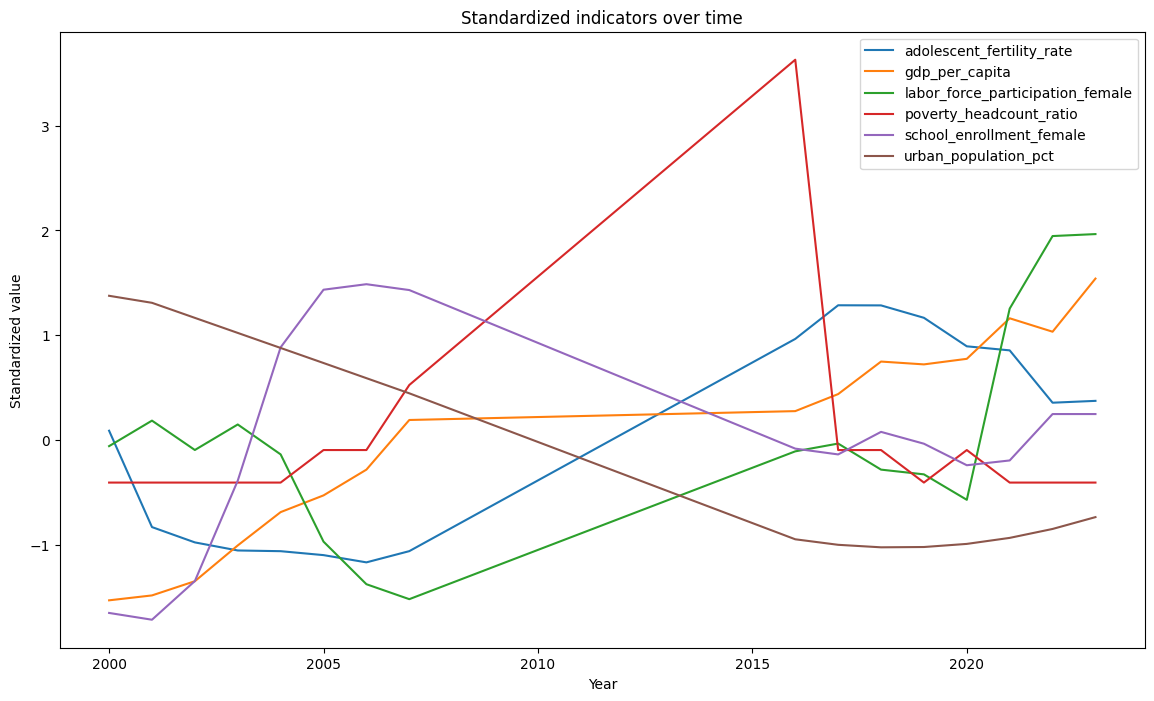

In [185]:
# Plot remaining columns
plt.figure(figsize=(14,8))
for col in df_standardized.columns:
    plt.plot(df_standardized.index, df_standardized[col], label=col)
plt.title('Standardized indicators over time')
plt.xlabel('Year')
plt.ylabel('Standardized value')
plt.legend()
plt.show()

At this stage, we can isolate the graph for labor_force_participation to answer Q1: "How has female labor force participation in Slovakia changed over time?"

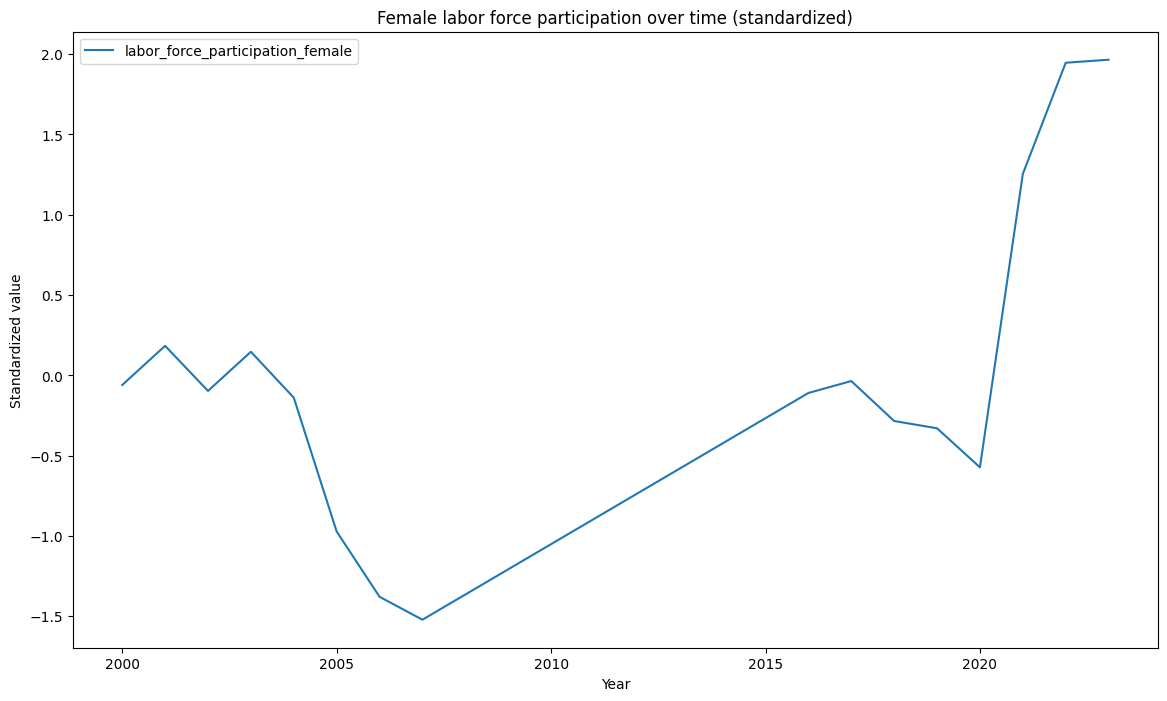

In [191]:
# Plot female labor force participation over time
plt.figure(figsize=(14,8))
plt.plot(df_standardized.index, df_standardized['labor_force_participation_female'], label='labor_force_participation_female')
plt.title('Female labor force participation over time (standardized)')
plt.xlabel('Year')
plt.ylabel('Standardized value')
plt.legend()
plt.show()

Answer to Q1: Female labor force participation has fallen between 2003-2007, then grew 2007-2017, falling again slightly 2017-2020, then grew at a much faster pace 2020-2022, after which it leveled out. Instead of a consistent rise over time, we are instead seeing periods of largely undisturbed growth interspersed with periods of decline.

To answer Q2 ("What is the relationship between education, adolescent fertility, and female labor participation?"), we can build a correlation matrix and some pair plots.

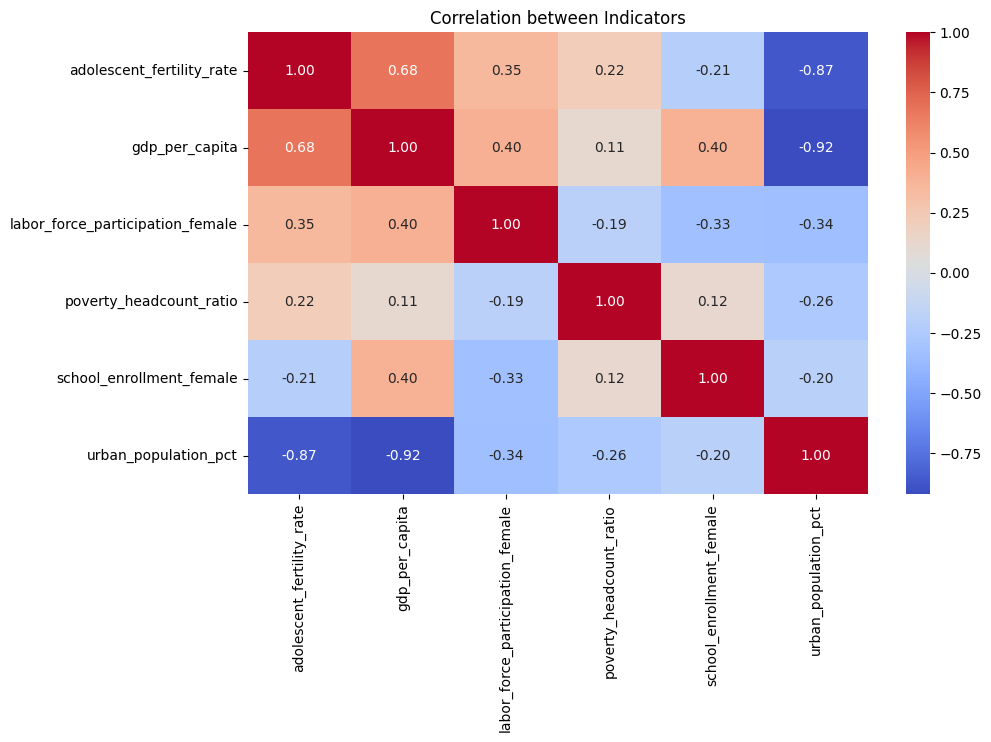

In [192]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_standardized.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Indicators')
plt.show()

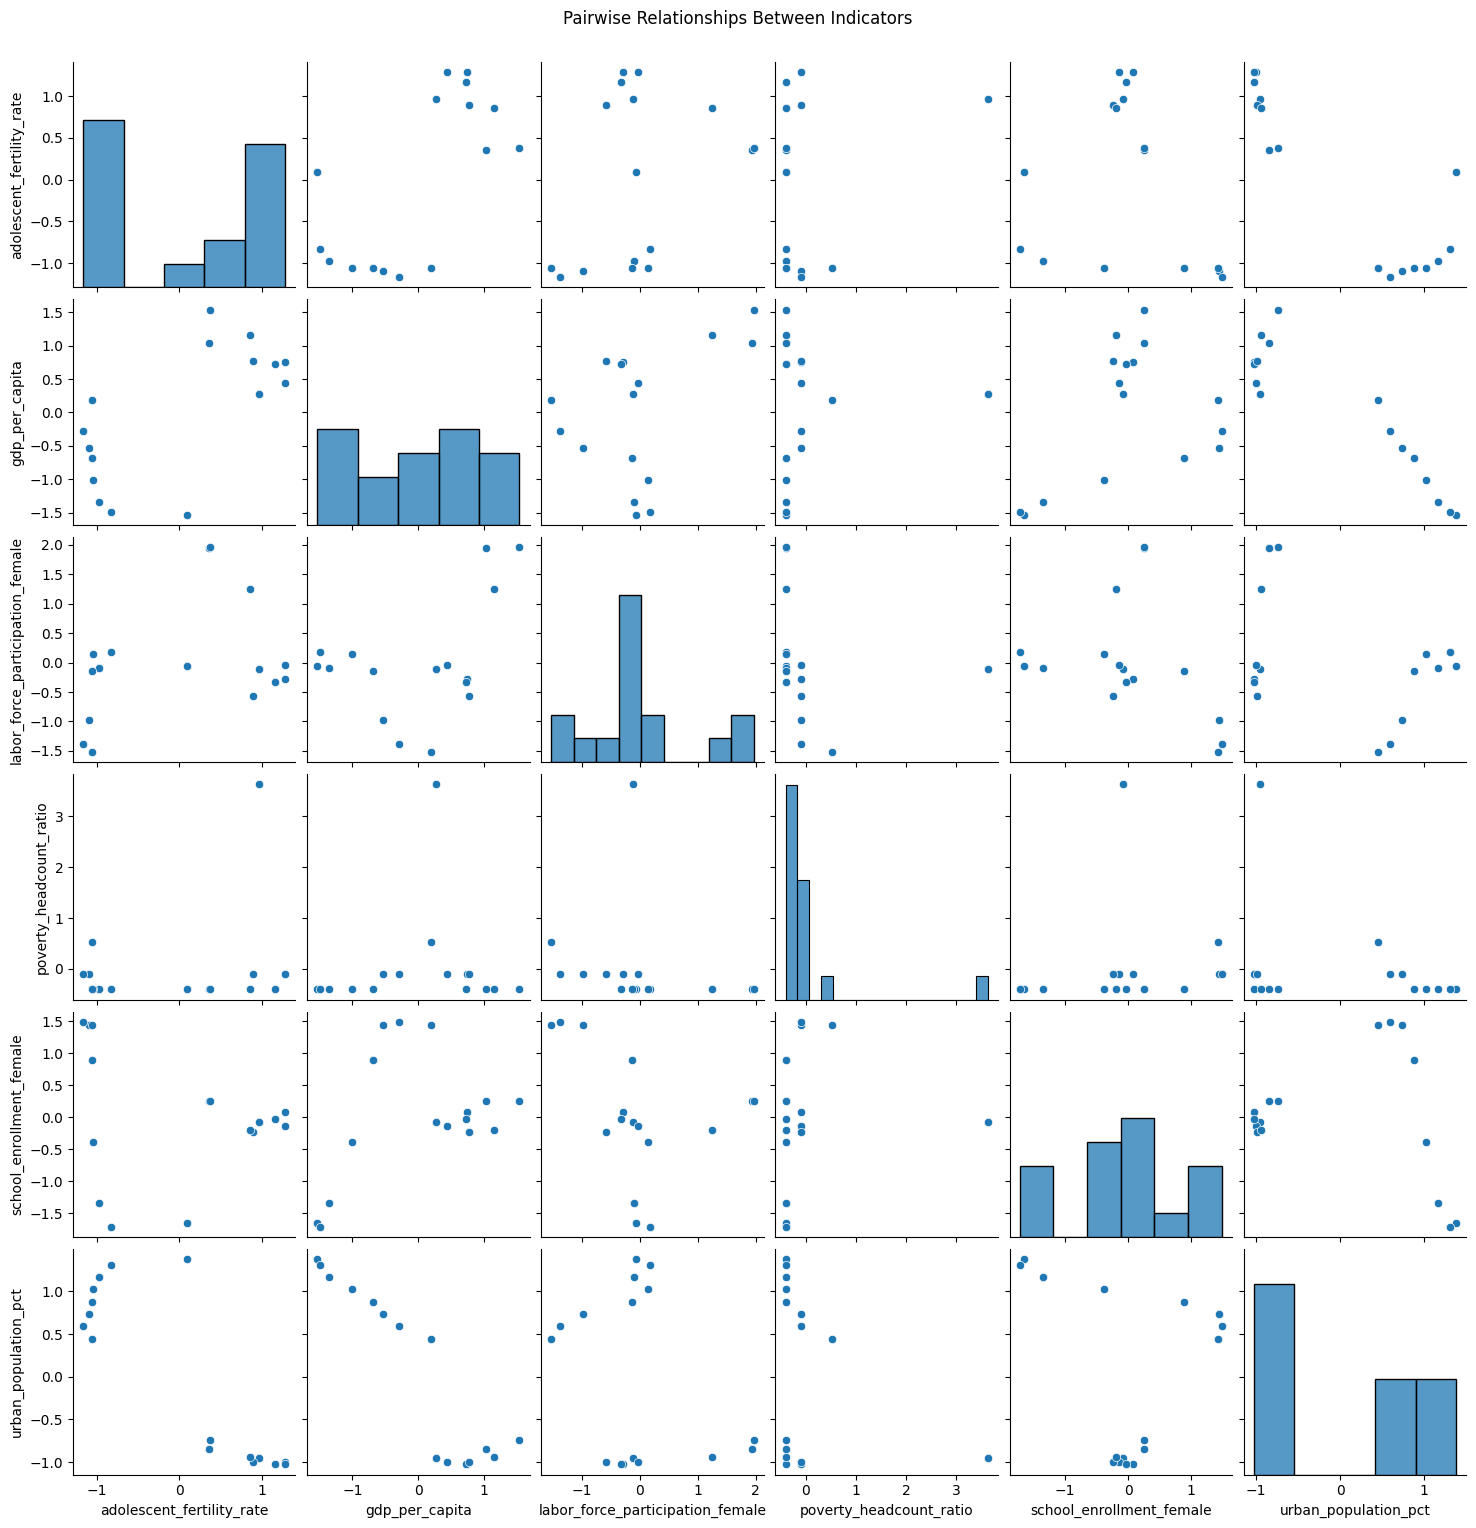

In [187]:
# Pairplot (if dataset not too big)
sns.pairplot(df_standardized)
plt.suptitle('Pairwise Relationships Between Indicators', y=1.02)
plt.show()

There is evidence of a relationship between education levels, adolescent fertility, and female labor force participation:

**Education and Female Labor Participation:**
While higher female school enrollment should ideally lead to higher labor force participation, our correlation (-0.33) is weakly negative. This is likely due to short-term trade-offs: when more young women are in school, fewer are immediately in the workforce. Moreover, the timespan of our dataset is relatively small (i.e. 23 years), which might not capture the lag between education and workforce entry.
  
**Adolescent Fertility and Female Labor Participation:**
A correlation of 0.35 indicates a weak positive association between adolescent fertility and female labor force participation. This may seem counterintuitive because higher adolescent fertility might be associated with lower education and limited economic opportunities for women, and therefore lower labor force participation. However, early motherhood may lead to early workforce entry, which would explain why it is positively associated with female labor force participation.

# Step 4: Modelling

To answer Q3, ("Can we build a regression model to predict female labor force participation using features like GDP, poverty, adolescent fertility, and female school enrollment?"), we need to create a regression model.

In [ ]:
# Review what dataset looks like
df_standardized

,adolescent_fertility_rate,gdp_per_capita,labor_force_participation_female,poverty_headcount_ratio,school_enrollment_female,urban_population_pct
year,,,,,,
2000,0.087589,-1.532320,-0.059751,-0.407725,-1.652840,1.376140
2001,-0.832781,-1.485458,0.183938,-0.407725,-1.717554,1.309067
2002,-0.979093,-1.349761,-0.096595,-0.407725,-1.348363,1.165338
2003,-1.056198,-1.008041,0.147094,-0.407725,-0.389247,1.021610
2004,-1.062968,-0.689851,-0.138610,-0.407725,0.883883,0.877881
2005,-1.100580,-0.530104,-0.971807,-0.097077,1.434184,0.734153
2006,-1.169787,-0.284161,-1.378386,-0.097077,1.486805,0.589466
2007,-1.062592,0.189980,-1.521238,0.524217,1.430873,0.444780
2016,0.964330,0.274669,-0.109523,3.630692,-0.083549,-0.949386


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df_standardized.drop(columns=['labor_force_participation_female'])
y = df_standardized['labor_force_participation_female']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse:.2f}")
print(f"Test R^2: {r2:.2f}")

# Coefficients interpretation
coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_}).sort_values(by='coefficient', ascending=False)
print(coef_df)


Test MSE: 6.40
Test R^2: -4.73
                     feature  coefficient
4       urban_population_pct     5.443131
1             gdp_per_capita     3.013984
0  adolescent_fertility_rate     2.790265
2    poverty_headcount_ratio     0.300907
3   school_enrollment_female    -0.584332


## Results interpretation

The linear regression model used to predict female labor force participation showed poor performance, with a high test mean squared error (MSE) of 6.40 and a negative R² value of -4.73, indicating that the model performed worse than simply predicting the mean for all observations. The feature coefficients suggest that urban population percentage and GDP per capita were positively associated with labor force participation, while female school enrollment showed a slight negative relationship. 

However, due to the poor fit of the model, these relationships should be interpreted with caution. The results suggest a need for either more data, different feature selection, or alternative modeling techniques to better capture the complex dynamics influencing female labor force participation.

## Using model on sample prediciton

We can imagine a new scenario that requires a prediction from our model to answer. For example, predicting labor force participation for a hypothetical country.

We can run an example prediction from our model below.

In [198]:
# Example scenario: Predicting labor force participation for a hypothetical country
example = pd.DataFrame({
    'adolescent_fertility_rate': [0.5],
    'gdp_per_capita': [1.0],
    'poverty_headcount_ratio': [-0.2],
    'school_enrollment_female': [0.3],
    'urban_population_pct': [-0.5]
})

# Predict
predicted_participation = model.predict(example)[0]
print(f"Predicted labor force participation (standardized): {predicted_participation:.2f}")

Predicted labor force participation (standardized): 1.60


For example, if a country has a moderately high GDP per capita, low adolescent fertility, moderate school enrollment, and a below-average urban population percentage, the model predicts a standardized female labor participation of 1.60. 

While the value is not in raw percentage form (due to standardization), it indicates a relatively high labor force participation compared to the average. 

However, given the model's poor R² score (-4.73), this prediction should be interpreted with caution. The result emphasizes the potential influence of GDP and fertility, but also suggests that more data and alternative models may be needed to improve accuracy.